In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

VOUT WIHTOUT PARASITIC CAPACITANCES

In [3]:
# Define symbols
V1, V2, Vo1_2, Vo = sp.symbols("V1 V2 Vo1_2 Vo")
T, Ro, Cf, Co, Fclk = sp.symbols("T Ro Cf Co Fclk")

# Define the two equations for vo1 and vo2
eq1 = (((V1-Vo)*Cf)+(Vo*Co))
eq2 = (((-V2+Vo1_2)*Cf)+(Co*Vo1_2)+((T*Vo)/(2*Ro)))

eq3 = (((V2-Vo1_2)*Cf)+(Co*Vo1_2))
eq4 = (((Vo-V1)*Cf)+(Co*Vo)+((Vo1_2*T)/(2*Ro)))

# Set vo1 = vo2
combined_equation1 = sp.Eq(eq1, eq2)
combined_equation2 = sp.Eq(eq3, eq4)

# Solve for Vo 
solution_q1 = sp.solve(combined_equation1, Vo1_2)
solution_q2 = sp.solve(combined_equation2, Vo1_2)

In [4]:
solution_q1[0]

(Cf*Ro*V1 + Cf*Ro*V2 - Cf*Ro*Vo + Co*Ro*Vo - T*Vo/2)/(Ro*(Cf + Co))

In [5]:
solution_q2[0]

2*Ro*(Cf*V1 + Cf*V2 - Cf*Vo - Co*Vo)/(2*Cf*Ro - 2*Co*Ro + T)

In [6]:
# Define symbols
V1, V2, Vo, VDD = sp.symbols("V1 V2 Vo VDD")
Fclk, Ro, Cf, Co, Cp1, Cp2 = sp.symbols("Fclk Ro Cf Co Cp1 Cp2")

# Define the two equations for vo1 and vo2
vo1 = (Cf*Ro*V1 + Cf*Ro*V2 - Cf*Ro*Vo + Co*Ro*Vo - T*Vo/2)/(Ro*(Cf + Co))
vo2 = 2*Ro*(Cf*V1 + Cf*V2 - Cf*Vo - Co*Vo)/(2*Cf*Ro - 2*Co*Ro + T)

# Set vo1 = vo2
combined_equation = sp.Eq(vo1, vo2)

# Solve for Vo 
solution_Vo = sp.solve(combined_equation, Vo)

solution_Vo[0]

2*Cf*Ro*(V1 + V2)/(4*Cf*Ro + T)

EFFICIENCY

In [7]:
Ii = ((V1-Vo)-(V2-Vo))*Fclk*Cf
Io = (((V1-Vo)-(Vo-V2))+((V2-Vo)-(Vo-V1)))*Fclk*Cf

Eff = (Vo*Io)/((V1+V2)*Ii)

Eff

Vo*(2*V1 + 2*V2 - 4*Vo)/((V1 - V2)*(V1 + V2))

VOUT AND EFFICIENCY WITH PARASITIC CAPACITANCES

In [8]:
# Define the two equations for vo1 and vo2
eq1CP = (((V1-Vo)*Cf)+(Vo*Co)+(V1*Cp1))
eq2CP = (((-V2+Vo1_2)*Cf)+(Co*Vo1_2)+((T*Vo)/(2*Ro))+(Vo*Cp2))

eq3CP = (((V2-Vo1_2)*Cf)+(Co*Vo1_2)+(Vo*Cp2))
eq4CP = (((Vo-V1)*Cf)+(Co*Vo)+((Vo1_2*T)/(2*Ro))+(V1*Cp1))

# Set vo1 = vo2
combined_equation1CP = sp.Eq(eq1CP, eq2CP)
combined_equation2CP = sp.Eq(eq3CP, eq4CP)

# Solve for Vo 
solution_q1CP = sp.solve(combined_equation1CP, Vo1_2)
solution_q2CP = sp.solve(combined_equation2CP, Vo1_2)

In [9]:
combined_equation1CP

Eq(Cf*(V1 - Vo) + Co*Vo + Cp1*V1, Cf*(-V2 + Vo1_2) + Co*Vo1_2 + Cp2*Vo + T*Vo/(2*Ro))

In [10]:
combined_equation2CP

Eq(Cf*(V2 - Vo1_2) + Co*Vo1_2 + Cp2*Vo, Cf*(-V1 + Vo) + Co*Vo + Cp1*V1 + T*Vo1_2/(2*Ro))

In [11]:
solution_q1CP[0]

(Cf*Ro*V1 + Cf*Ro*V2 - Cf*Ro*Vo + Co*Ro*Vo + Cp1*Ro*V1 - Cp2*Ro*Vo - T*Vo/2)/(Ro*(Cf + Co))

In [12]:
solution_q2CP[0]

2*Ro*(Cf*V1 + Cf*V2 - Cf*Vo - Co*Vo - Cp1*V1 + Cp2*Vo)/(2*Cf*Ro - 2*Co*Ro + T)

In [13]:
# Define the two equations for vo1 and vo2
vo1CP = (Cf*Ro*V1 + Cf*Ro*V2 - Cf*Ro*Vo + Co*Ro*Vo + Cp1*Ro*V1 - Cp2*Ro*Vo - T*Vo/2)/(Ro*(Cf + Co))
vo2CP = 2*Ro*(Cf*V1 + Cf*V2 - Cf*Vo - Co*Vo - Cp1*V1 + Cp2*Vo)/(2*Cf*Ro - 2*Co*Ro + T)

# Set vo1 = vo2
combined_equationCP = sp.Eq(vo1CP, vo2CP)

# Solve for Vo 
solution_VoCP = sp.solve(combined_equationCP, Vo)

solution_VoCP[0]

2*Ro*(-4*Cf*Co*Ro*V1 - 4*Cf*Co*Ro*V2 + 4*Cf*Cp1*Ro*V1 + Cf*T*V1 + Cf*T*V2 + Cp1*T*V1)/(-16*Cf*Co*Ro**2 + 8*Cf*Cp2*Ro**2 + 4*Cf*Ro*T - 4*Co*Ro*T + 2*Cp2*Ro*T + T**2)

In [14]:
equation = 2*Ro*(-4*Cf*Co*Ro*V1 - 4*Cf*Co*Ro*V2 + 4*Cf*Cp1*Ro*V1 + Cf*T*V1 + Cf*T*V2 + Cp1*T*V1)/(-16*Cf*Co*Ro**2 + 8*Cf*Cp2*Ro**2 + 4*Cf*Ro*T - 4*Co*Ro*T + 2*Cp2*Ro*T + T**2)

equation = equation.subs(T, 1/Fclk)

equation = equation.subs(V1, VDD)

equation = equation.subs(V2, 0)

vo = sp.simplify(equation)

vo

2*Fclk*Ro*VDD*(4*Cf*Fclk*Ro*(-Co + Cp1) + Cf + Cp1)/(8*Cf*Fclk**2*Ro**2*(-2*Co + Cp2) + 2*Fclk*Ro*(2*Cf - 2*Co + Cp2) + 1)

In [15]:
Ii = ((Cf + Cp1) * (V1 - Vo) - (Cf + Cp2) * (V2 - Vo)) * Fclk
Io = (((Cf + Cp1) * (V1 - Vo) - (Vo - V2)) + ((Cf + Cp2) * (V2 - Vo) - (Vo - V1))) * Fclk

Eff = (Vo*Io)/((V1+V2)*Ii)

Eff

Vo*(V1 + V2 - 2*Vo + (Cf + Cp1)*(V1 - Vo) + (Cf + Cp2)*(V2 - Vo))/((V1 + V2)*((Cf + Cp1)*(V1 - Vo) - (Cf + Cp2)*(V2 - Vo)))

CLOCK FREQUENCY

In [16]:
equation = 2*Cf*Ro*(V1 + V2)/(4*Cf*Ro + T)

equation = equation.subs(T, 1/Fclk)

# Equation for Vo
vo_equation = sp.Eq(Vo, equation)

# Solve for Fclk
fclk_solution = sp.solve(vo_equation, Fclk)

# Simplify the result
fclk_simplified = sp.simplify(fclk_solution[0])

# Display the simplified equation for Fclk
fclk_simplified



Vo/(2*Cf*Ro*(V1 + V2 - 2*Vo))

C:\Users\crodr\AppData\Local\Temp\ipykernel_33220\253387971.py:10: RuntimeWarning: divide by zero encountered in divide
  return numerator / denominator


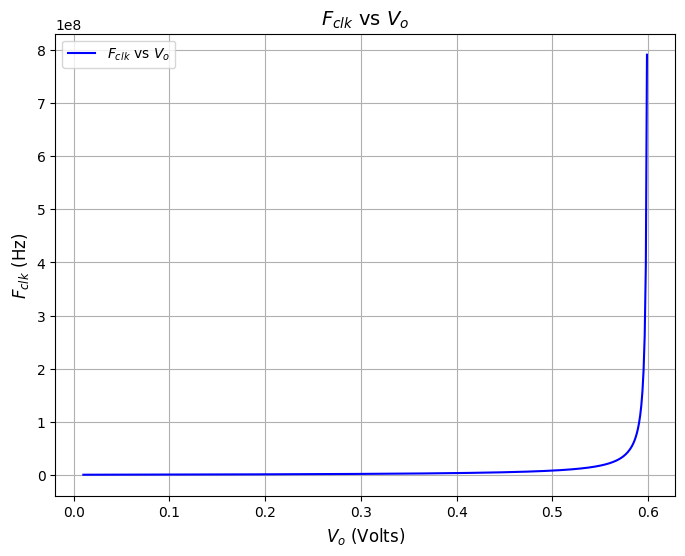

In [17]:
Cf = 10E-9 # Capacitance in Farads (e.g., 1 pF)
Ro = 16    # Resistance in Ohms (e.g., 1 kOhm)
V1 = 1.2    # Voltage in Volts
V2 = 0    # Voltage in Volts

# Equation: F_clk as a function of Vo
def Fclk(Vo, Cf, Ro, V1, V2):
    numerator = Vo
    denominator = 2*Cf*Ro*(V1+V2-2*Vo)
    return numerator / denominator

# Generate Vo values (x-axis)
Vo_values = np.linspace(0.01, 0.6, 500)  # Avoid Vo=0 to prevent division by zero

# Calculate Fclk values (y-axis)
Fclk_values = Fclk(Vo_values, Cf, Ro, V1, V2)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(Vo_values, Fclk_values, label=r"$F_{clk}$ vs $V_o$", color='blue')
plt.xlabel(r"$V_o$ (Volts)", fontsize=12)
plt.ylabel(r"$F_{clk}$ (Hz)", fontsize=12)
plt.title(r"$F_{clk}$ vs $V_o$", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()